In [4]:
import prop
import numpy as np
import matplotlib.pyplot as plt

#Исходные данные
T11 = 78.90316091
T21 = 32.74489031
T22 = 62.53783934
G1 = 331.054065
G2 = 331.054065
P11 = 0.254324
P21 = 6
fluid1 = "R236ea"
fluid2 = fluid1

dP1max = 10 * 10**-3 #10 kPa
dP2max = dP1max
dQheat = 0.99


#T-Q anal
hsteps = 40

p2 = P21
p1 = P11

H21 = prop.t_p(T21, P21, fluid2)["H"]
H22 = prop.t_p(T22, P21 - dP2max, fluid2)["H"]
H11 = prop.t_p(T11, P11, fluid1)["H"]

step = (H22 - H21) / hsteps
t1 = np.zeros(hsteps + 1)
t2 = np.zeros(hsteps + 1)
Q = np.zeros(hsteps + 1)
h21 = H21
h11 = H11

for i in range(hsteps + 1):
    t2[i] = prop.h_p(h21, p2, fluid2)["T"]
    if i < hsteps:
        h22 = h21 + step
        dQ = G2 * (h22 - h21) / dQheat
        h21 = h22
        p2 = p2 - dP2max/hsteps
        Q[i + 1] = Q[i] + dQ
for i in range(hsteps + 1):
    t1[hsteps - i] = prop.h_p(h11, p1, fluid1)["T"]
    if i < hsteps:
        h12 = h11 - (Q[hsteps-i]-Q[hsteps-i-1])/G1
        h11 = h12
        p1 = p1-dP1max/hsteps
DT = t1 - t2
min_dt = min(DT[:-1])
T12 = t1[0]
T22 = t2[-1]

#в каждой секции
for i in range(hsteps):
    t1av = (t1[i] + t1[i+1])/2
    t2av = (t2[i] + t2[i+1])/2
    p1av = (P11 - dP1max*i/hsteps + P11 - dP1max*(i+1)/hsteps)/2
    p2av = (P21 - dP1max*i/hsteps + P21 - dP2max*(i+1)/hsteps)/2

    ro1 = prop.t_p(t1av, p1av, fluid1)["ro"]
    ro2 = prop.t_p(t2av, p2av, fluid2)["ro"]
    lamda1 = prop.t_p(t1av, p1av, fluid1)["lamda"]
    lamda2 = prop.t_p(t2av, p2av, fluid2)["lamda"]
    nu1 = prop.t_p(t1av, p1av, fluid1)["nu"]
    nu2 = prop.t_p(t2av, p2av, fluid2)["nu"]
    Pr1 = prop.t_p(t1av, p1av, fluid1)["Pr"]
    Pr2 = prop.t_p(t2av, p2av, fluid2)["Pr"]
    print(G1/prop.t_p(T11, P11, fluid1)["ro"],G1/prop.t_p(T12, P11-dP1max, fluid1)["ro"])
    print(G2/prop.t_p(T21, P21, fluid2)["ro"],G2/prop.t_p(T22, P21-dP2max, fluid2)["ro"])


#геометрия

Hc = 0.002 #высота канала
Wpl = 0.6 #ширина пластины

lamdaw = 20 #теплопроводность стенки
deltaw = 0.002 #толщина стенки пластины
delta = 10**-5 #шероховатость



23.87557407148378 21.340284644728264
0.23226003071350065 0.24873195275772186
23.87557407148378 21.340284644728264
0.23226003071350065 0.24873195275772186
23.87557407148378 21.340284644728264
0.23226003071350065 0.24873195275772186
23.87557407148378 21.340284644728264
0.23226003071350065 0.24873195275772186
23.87557407148378 21.340284644728264
0.23226003071350065 0.24873195275772186
23.87557407148378 21.340284644728264
0.23226003071350065 0.24873195275772186
23.87557407148378 21.340284644728264
0.23226003071350065 0.24873195275772186
23.87557407148378 21.340284644728264
0.23226003071350065 0.24873195275772186
23.87557407148378 21.340284644728264
0.23226003071350065 0.24873195275772186
23.87557407148378 21.340284644728264
0.23226003071350065 0.24873195275772186
23.87557407148378 21.340284644728264
0.23226003071350065 0.24873195275772186
23.87557407148378 21.340284644728264
0.23226003071350065 0.24873195275772186
23.87557407148378 21.340284644728264
0.23226003071350065 0.24873195275772186

4.998138012535264


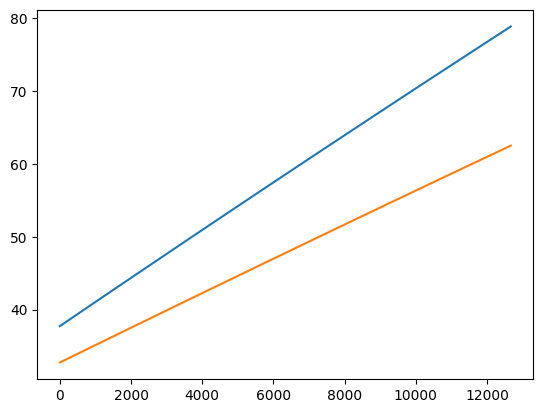

78.90316091 37.743028324046065 32.74489031 62.537839340601124


In [2]:
print(min_dt)
plt.plot(Q,t1)
plt.plot(Q,t2)
plt.show()
print(T11,T12,T21,T22)